<a href="https://colab.research.google.com/github/LohithVarun/Text_Summarization/blob/main/JournalPaperSummarization_Llama_Gemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rouge-score sentence-transformers

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=0527f90714f491500579ad635e8c129d5cd1a0d20c356a7357512d49439a0c20
  

In [3]:
# Install required packages
!pip install -q unsloth
!pip install -q transformers
!pip install -q accelerate
!pip install -q matplotlib
!pip install -q torch
!pip install -q PyPDF2
!pip install -q google.colab
!pip install sentence-transformers
!pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.7/190.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Please upload your research paper PDF file...


Saving pls_work.pdf to pls_work.pdf

Successfully read PDF file: pls_work.pdf
Total characters: 82236
Loading unsloth/Llama-3.2-3B-Instruct with Unsloth...
==((====))==  Unsloth 2025.3.3: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.35G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

Loading unsloth/gemma-2b-it with Unsloth...
==((====))==  Unsloth 2025.3.3: Fast Gemma patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.07G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

Unsloth: Will map <end_of_turn> to EOS = <eos>.



Processing 42 text chunks for evaluation...


Evaluating chunks (Llama): 0it [00:00, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Evaluating chunks (Llama): 5it [00:37,  7.54s/it]



Processing 42 text chunks for evaluation...


Evaluating chunks (Gemma): 5it [00:22,  4.47s/it]



--- FINAL EVALUATION RESULTS (LLAMA vs GEMMA - FAIR COMPARISON) ---

unsloth/Llama-3.2-3B-Instruct (Tuned) Scores (Original Reference):
ROUGE-1: 0.327
ROUGE-2: 0.127
ROUGE-L: 0.218

unsloth/gemma-2b-it (Initial) Scores (Original Reference):
ROUGE-1: 0.113
ROUGE-2: 0.006
ROUGE-L: 0.073

Generating comparison plots...


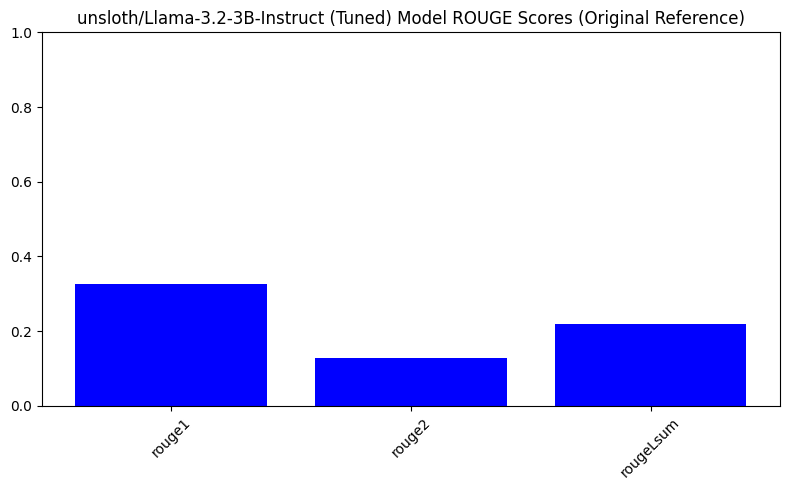

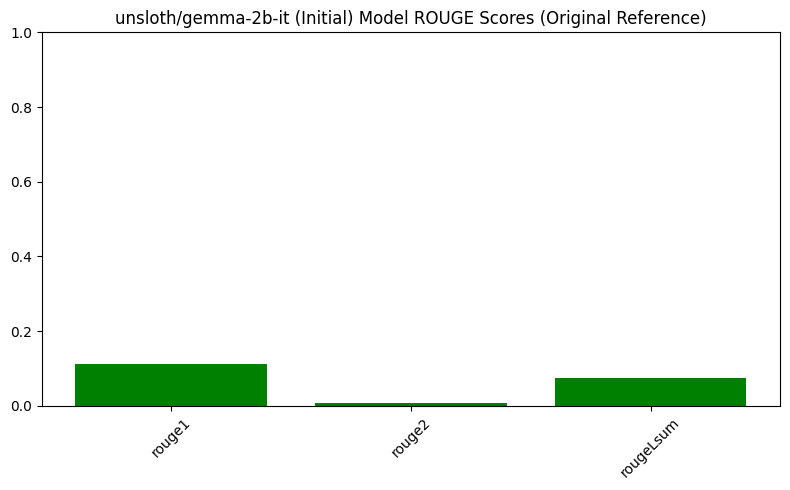

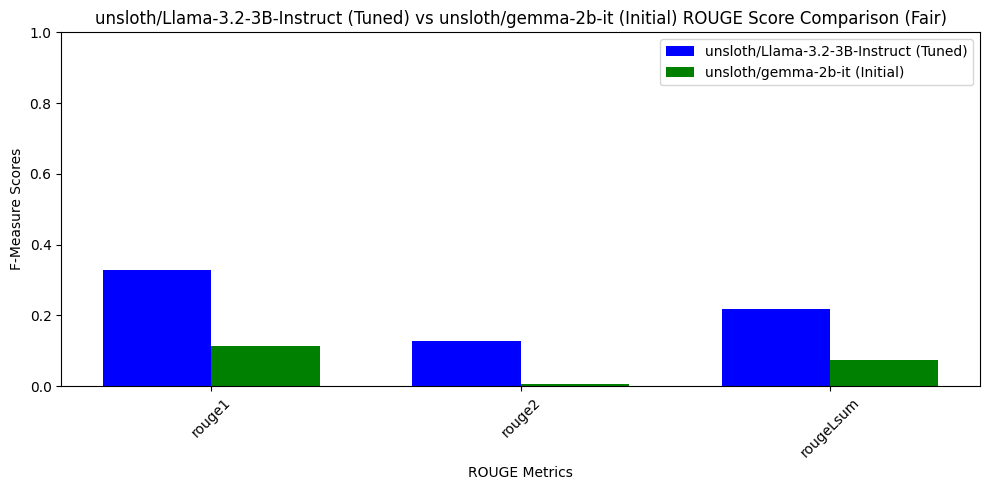

In [11]:
from unsloth import FastLanguageModel
from unsloth.chat_templates import get_chat_template
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import gc
from PyPDF2 import PdfReader
from google.colab import files
import io
import os
from rouge_score import rouge_scorer
import nltk


def upload_and_read_pdf():
    """Upload and read PDF file"""
    print("Please upload your research paper PDF file...")
    uploaded = files.upload()

    if not uploaded:
        raise Exception("No file was uploaded")

    file_name = list(uploaded.keys())[0]
    pdf_content = uploaded[file_name]

    # Read PDF content
    pdf_reader = PdfReader(io.BytesIO(pdf_content))
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()

    # Basic text cleaning
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = ' '.join(text.split())

    print(f"\nSuccessfully read PDF file: {file_name}")
    print(f"Total characters: {len(text)}")
    return text

def initialize_llama_model(model_name):
    """Initialize Llama model using Unsloth's FastLanguageModel"""
    try:
        print(f"Loading {model_name} with Unsloth...")
        # Initialize model using unsloth with a larger max_seq_length
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name=model_name,
            max_seq_length=8192,  # Increased from 2048*3
            dtype=None,  # Auto detect
            load_in_4bit=True
        )

        # For inference - important for Unsloth models
        FastLanguageModel.for_inference(model)

        # Set up chat template
        tokenizer = get_chat_template(
            tokenizer,
            chat_template="llama-3.1",
        )
        return model, tokenizer
    except Exception as e:
        print(f"Error initializing model {model_name} with Unsloth: {str(e)}")
        return None, None

def initialize_gemma_model(model_name):
    """Initialize Gemma model using Unsloth's FastLanguageModel"""
    try:
        print(f"Loading {model_name} with Unsloth...")
        # Initialize model using unsloth
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name=model_name,
            max_seq_length=2048*3, # Adjusted max_seq_length, can be tuned
            dtype=None,  # Auto detect
            load_in_4bit=True
        )

        # For inference - important for Unsloth models
        FastLanguageModel.for_inference(model)

        # Set up chat template
        tokenizer = get_chat_template(
            tokenizer,
            chat_template="gemma",
        )
        return model, tokenizer
    except Exception as e:
        print(f"Error initializing model {model_name} with Unsloth: {str(e)}")
        return None, None

def chunk_text(text, chunk_size=2000):
    """Split text into smaller chunks"""
    words = text.split()
    chunks = []
    current_chunk = []
    current_length = 0

    for word in words:
        current_length += len(word) + 1  # +1 for space
        if current_length > chunk_size:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
            current_length = len(word)
        else:
            current_chunk.append(word)

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

def generate_llama_summary(model, tokenizer, text, llama_max_new_tokens=140, llama_temperature=0.4):
    """Generate summary for Llama model with improved chunk handling."""
    try:
        # Break text into manageable chunks if it exceeds model's max sequence length
        max_input_length = model.config.max_position_embeddings - llama_max_new_tokens - 100  # Leave room for summary

        if len(tokenizer.encode(text)) > max_input_length:
            # Truncate text to fit within model's max sequence length
            truncated_text = tokenizer.decode(
                tokenizer.encode(text)[:max_input_length],
                skip_special_tokens=True
            )
            text = truncated_text

        generation_params = {
            "max_new_tokens": llama_max_new_tokens,
            "temperature": llama_temperature,
            "top_p": 0.9,
            "top_k": 50,
            "repetition_penalty": 1.2,
            "pad_token_id": tokenizer.eos_token_id,
            "use_cache": True
        }
        prompt = f"""Summarize the following research paper excerpt concisely, focusing on the most crucial information, key findings, arguments, and conclusions. Be brief and to the point.

        Excerpt:
        {text}

        Concise Summary:"""

        messages = [{"role": "user", "content": prompt}]

        inputs = tokenizer.apply_chat_template(
            messages,
            tokenize=True,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)

        with torch.no_grad():
            outputs = model.generate(
                input_ids=inputs,
                **generation_params
            )

        full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
        summary = full_output.split("Concise Summary:")[-1].strip()

        del outputs
        torch.cuda.empty_cache()
        return summary
    except Exception as e:
        print(f"Error generating summary: {str(e)}")
        return ""

def generate_gemma_summary(model, tokenizer, text, gemma_max_new_tokens=120, gemma_temperature=0.7):
    """Generate summary for Gemma model."""
    try:
        generation_params = {
            "max_new_tokens": gemma_max_new_tokens,
            "temperature": gemma_temperature,
            "top_p": 0.9,
            "top_k": 50,
            "repetition_penalty": 1.2,
            "pad_token_id": tokenizer.eos_token_id,
            "use_cache": True
        }
        prompt = f"""Summarize the following research paper excerpt concisely, highlighting the essential information.

        Excerpt:
        {text}

        Summary:"""

        messages = [{"role": "user", "content": prompt}]

        inputs = tokenizer.apply_chat_template(
            messages,
            tokenize=True,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)

        with torch.no_grad():
            outputs = model.generate(
                input_ids=inputs,
                **generation_params
            )

        full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
        summary = full_output.split("Summary:")[-1].strip()

        del outputs
        torch.cuda.empty_cache()
        return summary
    except Exception as e:
        print(f"Error generating summary: {str(e)}")
        return ""

def calculate_rouge(reference_text, summary_text):
    """Calculates ROUGE scores between reference and summary text."""
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeLsum'], use_stemmer=True)
    scores = scorer.score(reference_text, summary_text)
    return scores

def evaluate_llama_model(model, tokenizer, text, llama_max_new_tokens=140, llama_temperature=0.4, num_chunks=5):
    """Evaluate Llama model with ROUGE."""
    rouge_scores_model = {
        'rouge1_fmeasure': [],
        'rouge2_fmeasure': [],
        'rougeLsum_fmeasure': []
    }

    chunks = chunk_text(text, chunk_size=2000)  # Reduce chunk size
    print(f"\nProcessing {len(chunks)} text chunks for evaluation...")
    chunks_to_process = chunks[:min(num_chunks, len(chunks))]

    for i, chunk in tqdm(enumerate(chunks_to_process), desc="Evaluating chunks (Llama)"):
        summary = generate_llama_summary(model, tokenizer, chunk, llama_max_new_tokens, llama_temperature)
        if summary:
            try:
                reference_text = chunk
                rouge_scores = calculate_rouge(reference_text, summary)
                rouge_scores_model['rouge1_fmeasure'].append(rouge_scores['rouge1'].fmeasure)
                rouge_scores_model['rouge2_fmeasure'].append(rouge_scores['rouge2'].fmeasure)
                rouge_scores_model['rougeLsum_fmeasure'].append(rouge_scores['rougeLsum'].fmeasure)
                gc.collect()
                torch.cuda.empty_cache()
            except Exception as e:
                print(f"Error during Llama metric evaluation: {str(e)}")
                continue

    return {k: np.mean(v) if v else 0 for k, v in rouge_scores_model.items()}

def evaluate_gemma_model(model, tokenizer, text, gemma_max_new_tokens=120, gemma_temperature=0.7, num_chunks=5):
    """Evaluate Gemma model with ROUGE."""
    rouge_scores_model = {
        'rouge1_fmeasure': [],
        'rouge2_fmeasure': [],
        'rougeLsum_fmeasure': []
    }

    chunks = chunk_text(text)
    print(f"\nProcessing {len(chunks)} text chunks for evaluation...")
    chunks_to_process = chunks[:min(num_chunks, len(chunks))]

    for i, chunk in tqdm(enumerate(chunks_to_process), desc="Evaluating chunks (Gemma)"):
        summary = generate_gemma_summary(model, tokenizer, chunk, gemma_max_new_tokens, gemma_temperature)
        if summary:
            try:
                reference_text = chunk
                rouge_scores = calculate_rouge(reference_text, summary)
                rouge_scores_model['rouge1_fmeasure'].append(rouge_scores['rouge1'].fmeasure)
                rouge_scores_model['rouge2_fmeasure'].append(rouge_scores['rouge2'].fmeasure)
                rouge_scores_model['rougeLsum_fmeasure'].append(rouge_scores['rougeLsum'].fmeasure)
                gc.collect()
                torch.cuda.empty_cache()
            except Exception as e:
                print(f"Error during Gemma metric evaluation: {str(e)}")
                continue

    return {k: np.mean(v) if v else 0 for k, v in rouge_scores_model.items()}

def plot_metrics(model1_scores, model2_scores, model1_name, model2_name):
    """Plot comparison graphs interactively for ROUGE scores - FAIR COMPARISON."""
    metrics = ['rouge1', 'rouge2', 'rougeLsum']

    model1_rouge_values = [model1_scores['rouge1_fmeasure'], model1_scores['rouge2_fmeasure'], model1_scores['rougeLsum_fmeasure']]
    model2_rouge_values = [model2_scores['rouge1_fmeasure'], model2_scores['rouge2_fmeasure'], model2_scores['rougeLsum_fmeasure']]

    # Plot first model metrics
    plt.figure(figsize=(8, 5))
    plt.bar(metrics, model1_rouge_values, color='blue')
    plt.title(f'{model1_name} Model ROUGE Scores (Original Reference)') # Indicate original reference
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot second model metrics
    plt.figure(figsize=(8, 5))
    plt.bar(metrics, model2_rouge_values, color='green')
    plt.title(f'{model2_name} Model ROUGE Scores (Original Reference)') # Indicate original reference
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Comparative plot
    plt.figure(figsize=(10, 5))
    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, model1_rouge_values, width, label=model1_name, color='blue')
    plt.bar(x + width/2, model2_rouge_values, width, label=model2_name, color='green')

    plt.xlabel('ROUGE Metrics')
    plt.ylabel('F-Measure Scores')
    plt.title(f'{model1_name} vs {model2_name} ROUGE Score Comparison (Fair)') # Indicate fair comparison
    plt.xticks(x, metrics, rotation=45)
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


def main():
    try:
        paper_text = upload_and_read_pdf()

        model1_name = "unsloth/Llama-3.2-3B-Instruct"  # Llama 3B Instruct model
        model2_name = "unsloth/gemma-2b-it"  # Gemma 2B Instruct model

        final_model1_name = f"{model1_name} (Tuned)"
        final_model2_name = f"{model2_name} (Initial)"

        best_llama_params = {'max_new_tokens': 140, 'temperature': 0.4} # Best Llama params
        gemma_params = {'max_new_tokens': 120, 'temperature': 0.7} # Initial Gemma params


        model1_final, tokenizer1_final = initialize_llama_model(model1_name) # Initialize Llama
        model2_final, tokenizer2_final = initialize_gemma_model(model2_name) # Initialize Gemma


        if model1_final is None:
            print(f"Failed to initialize {model1_name} for final evaluation.")
            final_model1_scores = {'rouge1_fmeasure': 0, 'rouge2_fmeasure': 0, 'rougeLsum_fmeasure': 0}
        else:
            final_model1_scores = evaluate_llama_model(model1_final, tokenizer1_final, paper_text, llama_max_new_tokens=best_llama_params['max_new_tokens'], llama_temperature=best_llama_params['temperature'])

        if model2_final is None:
            print(f"Failed to initialize {model2_name} for final evaluation.")
            final_model2_scores = {'rouge1_fmeasure': 0, 'rouge2_fmeasure': 0, 'rougeLsum_fmeasure': 0}
        else:
            final_model2_scores = evaluate_gemma_model(model2_final, tokenizer2_final, paper_text, gemma_max_new_tokens=gemma_params['max_new_tokens'], gemma_temperature=gemma_params['temperature'])


        # Display final results
        # Display final results
        print("\n--- FINAL EVALUATION RESULTS (LLAMA vs GEMMA - FAIR COMPARISON) ---") # Updated title
        print(f"\n{final_model1_name} Scores (Original Reference):")
        print(f"ROUGE-1: {final_model1_scores['rouge1_fmeasure']:.3f}")
        print(f"ROUGE-2: {final_model1_scores['rouge2_fmeasure']:.3f}")
        print(f"ROUGE-L: {final_model1_scores['rougeLsum_fmeasure']:.3f}")

        print(f"\n{final_model2_name} Scores (Original Reference):")
        print(f"ROUGE-1: {final_model2_scores['rouge1_fmeasure']:.3f}")
        print(f"ROUGE-2: {final_model2_scores['rouge2_fmeasure']:.3f}")
        print(f"ROUGE-L: {final_model2_scores['rougeLsum_fmeasure']:.3f}")

        # Display plots
        print("\nGenerating comparison plots...")
        model1_display_name = final_model1_name
        model2_display_name = final_model2_name
        plot_metrics(final_model1_scores, final_model2_scores, model1_display_name, model2_display_name)


    except Exception as e:
        print(f"Error in main execution: {str(e)}")

if __name__ == "__main__":
    main()